In [ ]:
# Bibliotecas
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import pandas as pd


# Carrega o conjunto de dados
y = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/iris_target_aux.txt', sep=' ', header=None, names=['target'])
X = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/iris_input.txt', sep=' ',header=None , names=['comprimento sépala','largura sépala', 'comprimento da pétala','largura da pétala','f'])
X = X.drop('f', axis=1)



# lista de classificadores
classificadores = {'KNN k=1': KNeighborsClassifier(n_neighbors=1),
                   'KNN k=3': KNeighborsClassifier(n_neighbors=3),
                   'KNN k=5': KNeighborsClassifier(n_neighbors=5),
                   'KNN k=7': KNeighborsClassifier(n_neighbors=7),
                   'DMC': LinearDiscriminantAnalysis()}

# número de rodadas
n_rodadas = 50

# listas para armazenar as acurácias e matrizes de confusão
acc_knn1 = []
acc_knn3 = []
acc_knn5 = []
acc_knn7 = []
acc_dmc = []
cm_knn1 = np.zeros((3,3))
cm_knn3 = np.zeros((3,3))
cm_knn5 = np.zeros((3,3))
cm_knn7 = np.zeros((3,3))
cm_dmc = np.zeros((3,3))

# listas para armazenar as acurácias e matrizes de confusão para o caso 2
acc_knn1_2 = []
acc_knn3_2 = []
acc_knn5_2 = []
acc_knn7_2 = []
acc_dmc_2 = []
cm_knn1_2 = np.zeros((3,3))
cm_knn3_2 = np.zeros((3,3))
cm_knn5_2 = np.zeros((3,3))
cm_knn7_2 = np.zeros((3,3))
cm_dmc_2 = np.zeros((3,3))

# loop de 50 rodadas
for i in range(n_rodadas):
    # divide os dados em treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 ,stratify=y)

    # retirando para caso 2
    X_train_2 = X_train.drop('comprimento sépala', axis=1)
    X_test_2 = X_test.drop('comprimento sépala', axis=1)
    X_train_2 = X_train.drop('largura sépala', axis=1)
    X_test_2 = X_test.drop('largura sépala', axis=1)
    

    # treina e testa cada classificador
    for nome, clf in classificadores.items():
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)
        
        # armazena a acurácia e a matriz de confusão apropriada
        if nome == 'KNN k=1':
            acc_knn1.append(acc)
            cm_knn1 += cm
        elif nome == 'KNN k=3':
            acc_knn3.append(acc)
            cm_knn3 += cm
        elif nome == 'KNN k=5':
            acc_knn5.append(acc)
            cm_knn5 += cm
        elif nome == 'KNN k=7':
            acc_knn7.append(acc)
            cm_knn7 += cm
        elif nome == 'DMC':
            acc_dmc.append(acc)
            cm_dmc += cm

    # treina e testa cada classificador para o caso 2
    for nome, clf in classificadores.items():
        clf.fit(X_train_2, y_train)
        y_pred = clf.predict(X_test_2)
        acc = accuracy_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)
        
        # armazena a acurácia e a matriz de confusão apropriada para o caso 2
        if nome == 'KNN k=1':
            acc_knn1_2.append(acc)
            cm_knn1_2 += cm
        elif nome == 'KNN k=3':
            acc_knn3_2.append(acc)
            cm_knn3_2 += cm
        elif nome == 'KNN k=5':
            acc_knn5_2.append(acc)
            cm_knn5_2 += cm
        elif nome == 'KNN k=7':
            acc_knn7_2.append(acc)
            cm_knn7_2 += cm
        elif nome == 'DMC':
            acc_dmc_2.append(acc)
            cm_dmc_2 += cm

# calcula a média e desvio padrão das acurácias
media_knn1 = np.mean(acc_knn1)
desvio_padrao_knn1 = np.std(acc_knn1)
media_knn3 = np.mean(acc_knn3)
desvio_padrao_knn3 = np.std(acc_knn3)
media_knn5 = np.mean(acc_knn5)
desvio_padrao_knn5 = np.std(acc_knn5)
media_knn7 = np.mean(acc_knn7)
desvio_padrao_knn7 = np.std(acc_knn7)
media_dmc = np.mean(acc_dmc)
desvio_padrao_dmc = np.std(acc_dmc)

# calcula a média e desvio padrão das acurácias para o caso 2
media_knn1_2 = np.mean(acc_knn1_2)
desvio_padrao_knn1_2 = np.std(acc_knn1_2)
media_knn3_2 = np.mean(acc_knn3_2)
desvio_padrao_knn3_2 = np.std(acc_knn3_2)
media_knn5_2 = np.mean(acc_knn5_2)
desvio_padrao_knn5_2 = np.std(acc_knn5_2)
media_knn7_2 = np.mean(acc_knn7_2)
desvio_padrao_knn7_2 = np.std(acc_knn7_2)
media_dmc_2 = np.mean(acc_dmc_2)
desvio_padrao_dmc_2 = np.std(acc_dmc_2)


/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

                       comprimento sépala  largura sépala  \
comprimento sépala               1.000000       -0.117570   
largura sépala                  -0.117570        1.000000   
comprimento da pétala            0.871754       -0.428440   
largura da pétala                0.817941       -0.366126   
target                           0.782561       -0.426658   

                       comprimento da pétala  largura da pétala    target  
comprimento sépala                  0.871754           0.817941  0.782561  
largura sépala                     -0.428440          -0.366126 -0.426658  
comprimento da pétala               1.000000           0.962865  0.949035  
largura da pétala                   0.962865           1.000000  0.956547  
target                              0.949035           0.956547  1.000000  


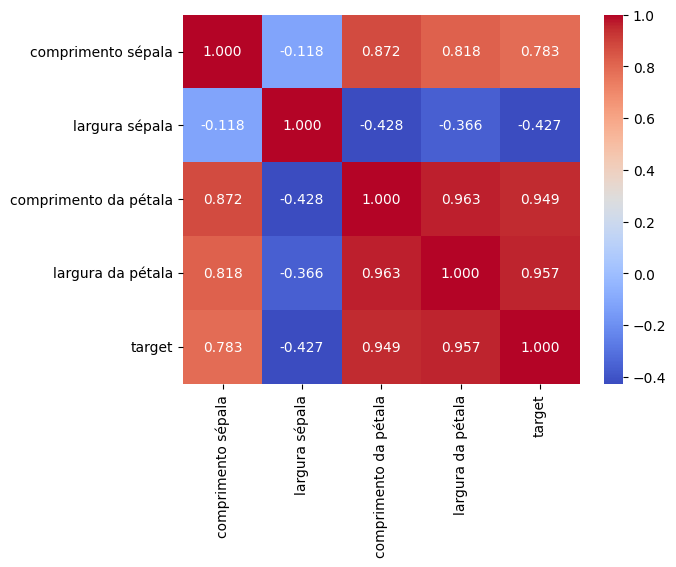

<Figure size 800x600 with 0 Axes>

Os dois atributos mais relevantes são:
 largura da pétala        0.956547
comprimento da pétala    0.949035
Name: target, dtype: float64


In [ ]:
data = pd.concat([X, y], axis=1)

# coeficiente de correlação,
correlations = data.corr()

print(correlations)

# Bibliotecas
import seaborn as sns
import matplotlib.pyplot as plt

# criar um gráfico de calor da matriz de correlação
sns.heatmap(correlations, annot=True, cmap="coolwarm", fmt=".3f")

# ajustar o tamanho do gráfico
plt.figure(figsize=(8, 6))

# mostrar o gráfico
plt.show()

# selecionando os dois atributos mais relevantes
corr_with_target = correlations.iloc[-1][:-1] # excluindo a última coluna (target)
two_most_correlated = corr_with_target.abs().sort_values(ascending=False)[:2]
print("Os dois atributos mais relevantes são:\n", two_most_correlated)

In [ ]:
# imprime as acurácias médias e desvios padrão para o caso 1
print('\n\nKNN k=1\nAcurácia média:', media_knn1, '\nDesvio padrão:', desvio_padrao_knn1, '\n')
print('KNN k=3\nAcurácia média:', media_knn3, '\nDesvio padrão:', desvio_padrao_knn3, '\n')
print('KNN k=5\nAcurácia média:', media_knn5, '\nDesvio padrão:', desvio_padrao_knn5, '\n')
print('KNN k=7\nAcurácia média:', media_knn7, '\nDesvio padrão:', desvio_padrao_knn7, '\n')
print('DMC\nAcurácia média:', media_dmc, '\nDesvio padrão:', desvio_padrao_dmc, '\n')

# imprime as matrizes de confusão para o caso 1
print('Matriz de confusão KNN k=1:')
print(cm_knn1)
print('Matriz de confusão KNN k=3:')
print(cm_knn3)
print('Matriz de confusão KNN k=5:')
print(cm_knn5)
print('Matriz de confusão KNN k=7:')
print(cm_knn7)
print('Matriz de confusão DMC:')
print(cm_dmc)




KNN k=1
Acurácia média: 0.958 
Desvio padrão: 0.02813459712801225 

KNN k=3
Acurácia média: 0.9613333333333334 
Desvio padrão: 0.025263060428661884 

KNN k=5
Acurácia média: 0.9680000000000001 
Desvio padrão: 0.025785439474418286 

KNN k=7
Acurácia média: 0.9680000000000001 
Desvio padrão: 0.025785439474418286 

DMC
Acurácia média: 0.98 
Desvio padrão: 0.023094010767585025 

Matriz de confusão KNN k=1:
[[500.   0.   0.]
 [  0. 471.  29.]
 [  0.  34. 466.]]
Matriz de confusão KNN k=3:
[[500.   0.   0.]
 [  0. 471.  29.]
 [  0.  29. 471.]]
Matriz de confusão KNN k=5:
[[500.   0.   0.]
 [  0. 472.  28.]
 [  0.  20. 480.]]
Matriz de confusão KNN k=7:
[[500.   0.   0.]
 [  0. 473.  27.]
 [  0.  21. 479.]]
Matriz de confusão DMC:
[[500.   0.   0.]
 [  0. 483.  17.]
 [  0.  13. 487.]]


In [ ]:
# imprime as acurácias médias e desvios padrão para o caso 2
print('\n\nKNN k=1\nAcurácia média_2:', media_knn1_2, '\nDesvio padrão_2:', desvio_padrao_knn1_2, '\n')
print('KNN k=3\nAcurácia média_2:', media_knn3_2, '\nDesvio padrão_2:', desvio_padrao_knn3_2, '\n')
print('KNN k=5\nAcurácia média_2:', media_knn5_2, '\nDesvio padrão_2:', desvio_padrao_knn5_2, '\n')
print('KNN k=7\nAcurácia média_2:', media_knn7_2, '\nDesvio padrão_2:', desvio_padrao_knn7_2, '\n')
print('DMC\nAcurácia média_2:', media_dmc_2, '\nDesvio padrão_2:', desvio_padrao_dmc_2, '\n')

# imprime as matrizes de confusão para o caso 2
print('Matriz de confusão KNN_2 k=1:')
print(cm_knn1_2)
print('Matriz de confusão KNN_2 k=3:')
print(cm_knn3_2)
print('Matriz de confusão KNN_2 k=5:')
print(cm_knn5_2)
print('Matriz de confusão KNN_2 k=7:')
print(cm_knn7_2)
print('Matriz de confusão DMC_2:')
print(cm_dmc_2)



KNN k=1
Acurácia média_2: 0.958 
Desvio padrão_2: 0.02813459712801225 

KNN k=3
Acurácia média_2: 0.9646666666666667 
Desvio padrão_2: 0.023485219938411378 

KNN k=5
Acurácia média_2: 0.9626666666666668 
Desvio padrão_2: 0.027194770739161517 

KNN k=7
Acurácia média_2: 0.9653333333333333 
Desvio padrão_2: 0.026633312473917568 

DMC
Acurácia média_2: 0.9773333333333335 
Desvio padrão_2: 0.023513589451397858 

Matriz de confusão KNN_2 k=1:
[[500.   0.   0.]
 [  0. 473.  27.]
 [  0.  36. 464.]]
Matriz de confusão KNN_2 k=3:
[[500.   0.   0.]
 [  0. 476.  24.]
 [  0.  29. 471.]]
Matriz de confusão KNN_2 k=5:
[[500.   0.   0.]
 [  0. 470.  30.]
 [  0.  26. 474.]]
Matriz de confusão KNN_2 k=7:
[[500.   0.   0.]
 [  0. 468.  32.]
 [  0.  20. 480.]]
Matriz de confusão DMC_2:
[[500.   0.   0.]
 [  0. 483.  17.]
 [  0.  17. 483.]]


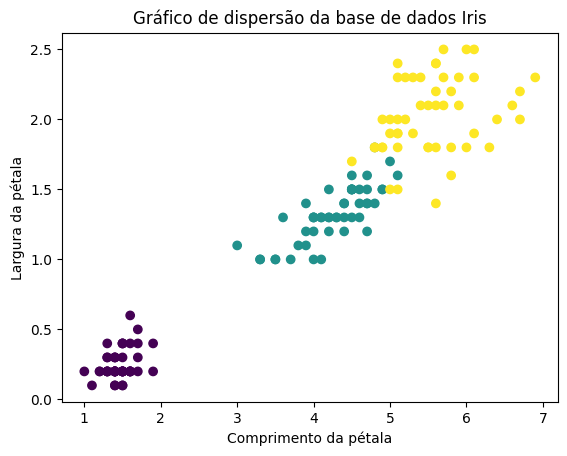

In [ ]:
# plotar o gráfico de dispersão
plt.scatter(X.iloc[:, 2], X.iloc[:, 3], c=y.T, cmap='viridis')
plt.xlabel('Comprimento da pétala')
plt.ylabel('Largura da pétala')
plt.title('Gráfico de dispersão da base de dados Iris')
plt.show()

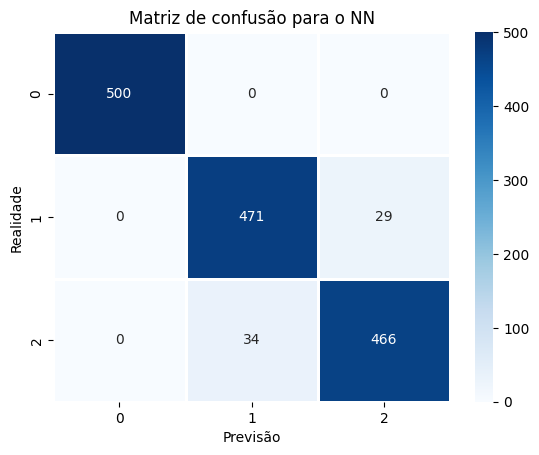

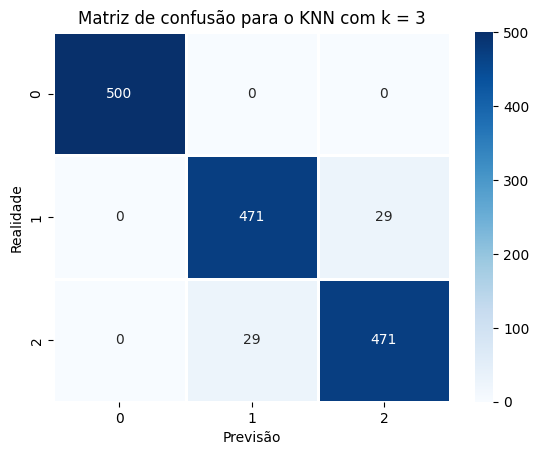

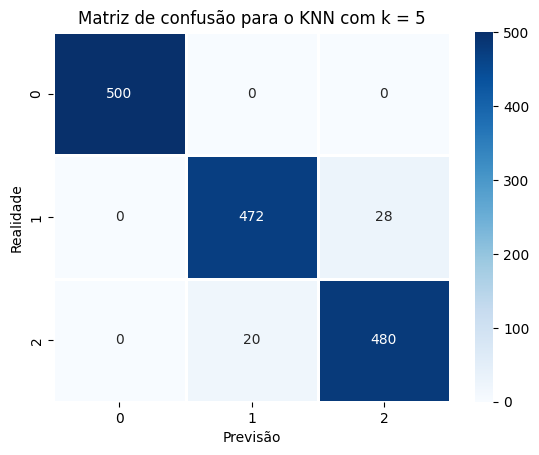

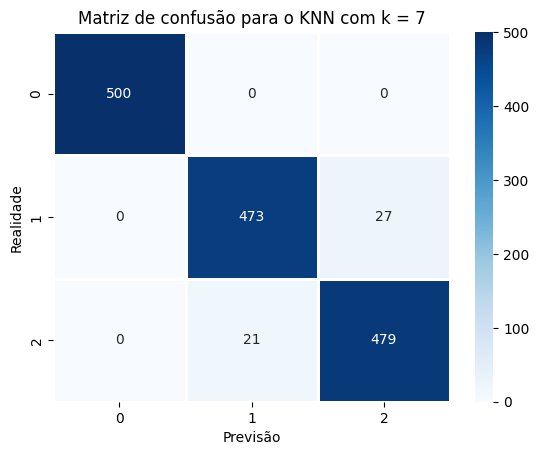

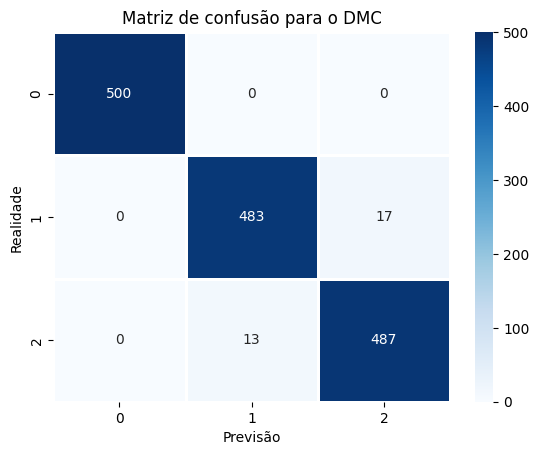

In [ ]:
# Plotando a matriz de confusão usando a biblioteca seaborn para o caso 1
sns.heatmap(cm_knn1, annot=True, cmap="Blues", linewidths=1, fmt=".0f")

plt.title("Matriz de confusão para o NN")
plt.xlabel("Previsão")
plt.ylabel("Realidade")
plt.show()


# Plotando a matriz de confusão usando a biblioteca seaborn para o caso 1
sns.heatmap(cm_knn3, annot=True, cmap="Blues", linewidths=1, fmt=".0f")

plt.title("Matriz de confusão para o KNN com k = 3")
plt.xlabel("Previsão")
plt.ylabel("Realidade")
plt.show()



# Plotando a matriz de confusão usando a biblioteca seaborn para o caso 1
sns.heatmap(cm_knn5, annot=True, cmap="Blues", linewidths=1, fmt=".0f")

plt.title("Matriz de confusão para o KNN com k = 5")
plt.xlabel("Previsão")
plt.ylabel("Realidade")
plt.show()


# Plotando a matriz de confusão usando a biblioteca seaborn para o caso 1
sns.heatmap(cm_knn7, annot=True, cmap="Blues", linewidths=1, fmt=".0f")

plt.title("Matriz de confusão para o KNN com k = 7")
plt.xlabel("Previsão")
plt.ylabel("Realidade")
plt.show()

# Plotando a matriz de confusão usando a biblioteca seaborn para o caso 1
sns.heatmap(cm_dmc, annot=True, cmap="Blues", linewidths=1, fmt=".0f")

plt.title("Matriz de confusão para o DMC")
plt.xlabel("Previsão")
plt.ylabel("Realidade")
plt.show()

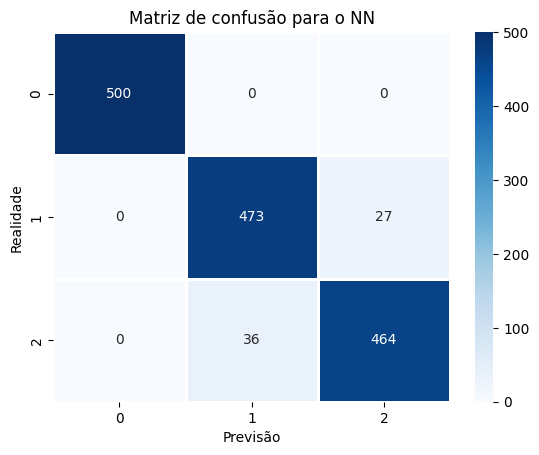

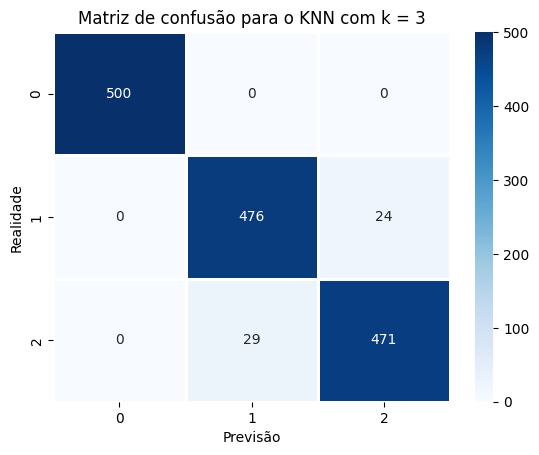

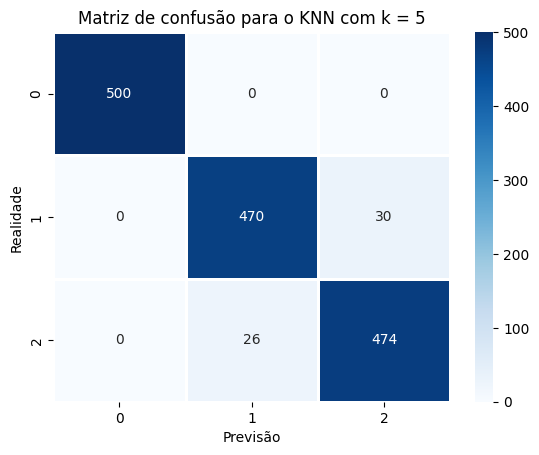

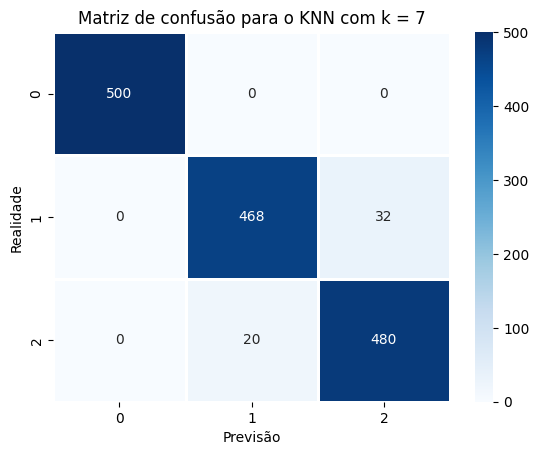

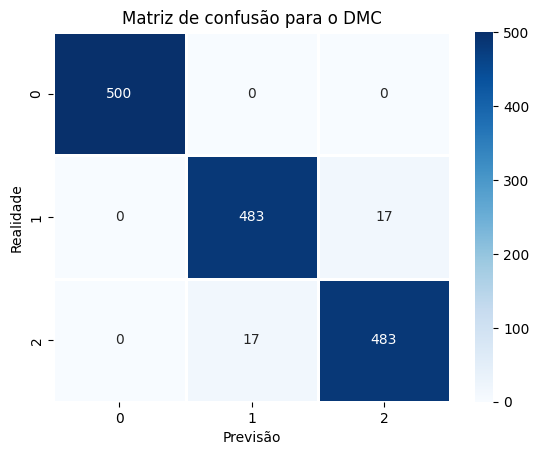

In [ ]:
# Plotando a matriz de confusão usando a biblioteca seaborn para o caso 2
sns.heatmap(cm_knn1_2, annot=True, cmap="Blues", linewidths=1, fmt=".0f")

plt.title("Matriz de confusão para o NN")
plt.xlabel("Previsão")
plt.ylabel("Realidade")
plt.show()


# Plotando a matriz de confusão usando a biblioteca seaborn para o caso 2
# Criando um ndarray
sns.heatmap(cm_knn3_2, annot=True, cmap="Blues", linewidths=1, fmt=".0f")

plt.title("Matriz de confusão para o KNN com k = 3")
plt.xlabel("Previsão")
plt.ylabel("Realidade")
plt.show()



# Plotando a matriz de confusão usando a biblioteca seaborn para o caso 2
sns.heatmap(cm_knn5_2, annot=True, cmap="Blues", linewidths=1, fmt=".0f") 

plt.title("Matriz de confusão para o KNN com k = 5")
plt.xlabel("Previsão")
plt.ylabel("Realidade")
plt.show()


# Plotando a matriz de confusão usando a biblioteca seaborn para o caso 2
sns.heatmap(cm_knn7_2, annot=True, cmap="Blues", linewidths=1, fmt=".0f")

plt.title("Matriz de confusão para o KNN com k = 7")
plt.xlabel("Previsão")
plt.ylabel("Realidade")
plt.show()

# Plotando a matriz de confusão usando a biblioteca seaborn para o caso 2
sns.heatmap(cm_dmc_2, annot=True, cmap="Blues", linewidths=1, fmt=".0f")

plt.title("Matriz de confusão para o DMC")
plt.xlabel("Previsão")
plt.ylabel("Realidade")
plt.show()